# Diabetes Dataset

In [17]:
from sklearn.datasets import load_diabetes

In [18]:
X, y = load_diabetes(as_frame = True, return_X_y=True, scaled=False)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [19]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

## Histogram

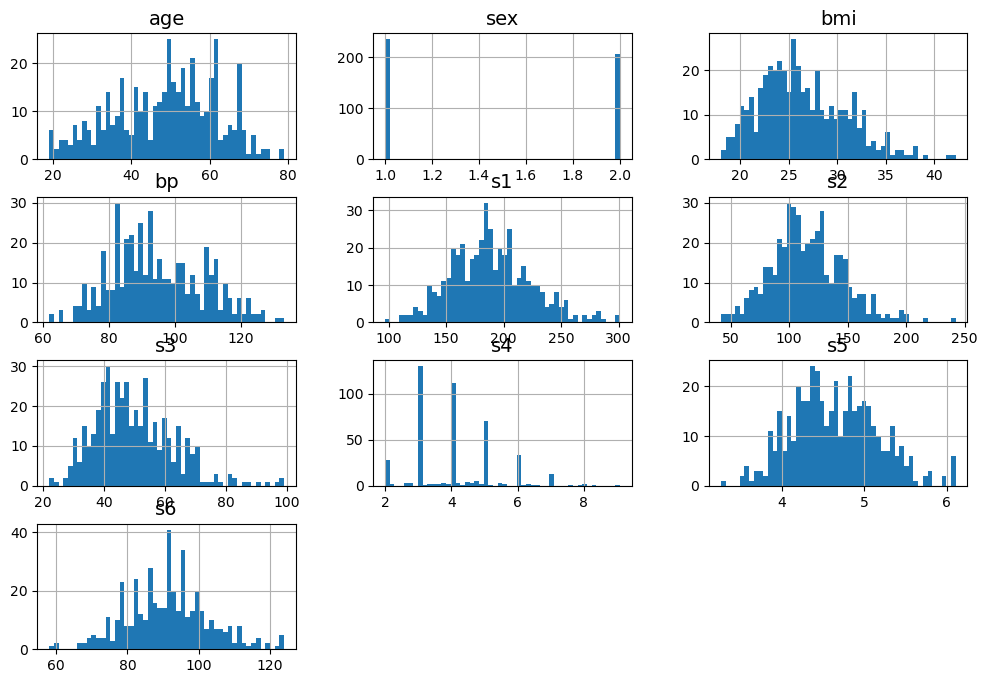

In [20]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X.hist(bins=50, figsize=(12, 8))
plt.show()

## Boxplot

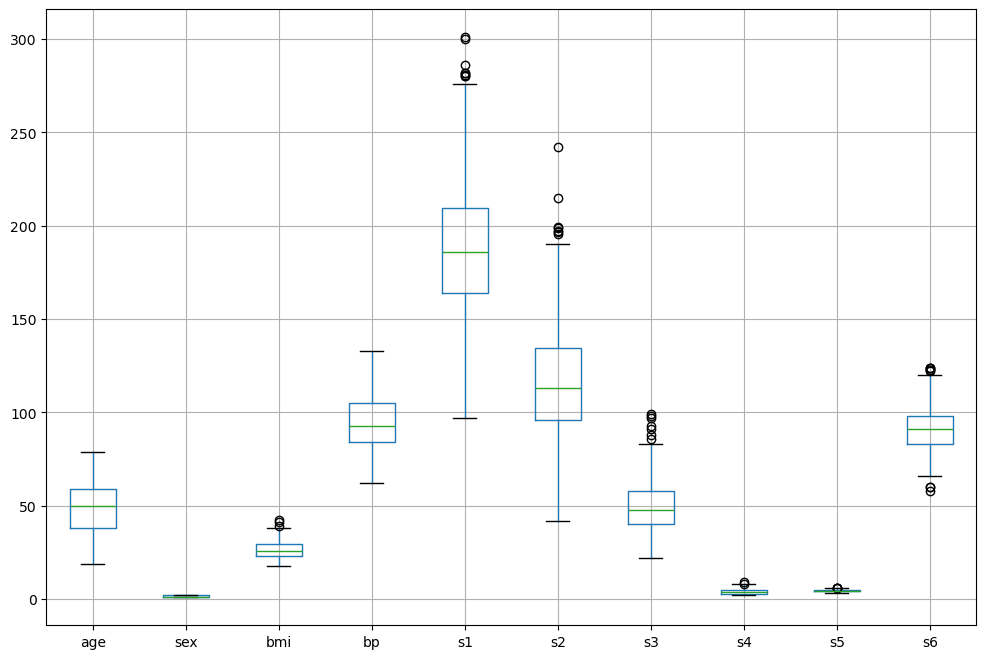

In [21]:
#Create a boxplot
X.boxplot(figsize=(12, 8))
plt.show()

## Describe data

In [22]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_cat
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484,5.312217
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005,1.332410
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000,2.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000,4.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000,5.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000,6.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000,8.000000


## Correlations between the data

In [23]:
data = X.copy()
data['target'] = y
corr_matrix = data.corr(numeric_only=True)
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

## Data preprocessing

### Age Bins

In [24]:
# Put age in bins for machine learning
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X['age'] = discretizer.fit_transform(X[['age']])
X['age'].value_counts()

age
5.0    85
6.0    69
4.0    55
3.0    53
2.0    47
7.0    47
8.0    33
1.0    28
0.0    19
9.0     6
Name: count, dtype: int64

In [25]:
data['age_cat'].head()

KeyError: 'age_cat'

## Sex Encoding

In [16]:
# one hot encode sex column
import pandas as pd

X = pd.get_dummies(X, columns=['sex'], drop_first=False)
X.head()

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"